In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('//content//customer_churn (2).csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


EDA

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Data Manipulation

In [ ]:
# a. Extract the 5th column & store it in ‘customer_5

In [ ]:
customer_5=df.iloc[:,4]

In [ ]:
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [ ]:
#b. Extract the 15th column & store it in ‘customer_15’

In [ ]:
customer_15=df.iloc[:,14]

In [ ]:
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [ ]:
#c.Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

In [ ]:
senior_male_electronic=df[(df['gender']=='Male')& (df['SeniorCitizen']==1)&(df['PaymentMethod']=='Electronic check')]

In [ ]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [ ]:
# d. Extract all those customers whose tenure is greater than 70 months or their
# Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [ ]:
customer_total_tenure=df[(df['tenure']>70)|(df['MonthlyCharges']>100)]

In [ ]:
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [ ]:
# e. Extract all the customers whose Contract is of two years, payment method is Mailed
# check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

In [ ]:
two_mail_yes=df[(df['Contract']== 'Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='yes')]

In [ ]:
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# f. Extract 333 random records from the customer_churndataframe & store the result in
# ‘customer_333’

In [ ]:
customer_333=df.sample(n=333)

In [ ]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6508,8708-XPXHZ,Female,0,Yes,Yes,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,4186.3,Yes
93,6067-NGCEU,Female,0,No,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),111.05,7107,No
541,2782-LFZVW,Female,0,No,No,11,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Mailed check,58.95,601.6,No
3375,3642-BYHDO,Female,0,Yes,Yes,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.90,1389.35,No
4098,5356-RHIPP,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,4957-TIALW,Female,0,No,Yes,15,Yes,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Credit card (automatic),65.60,1010,No
6084,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6791,5204-QZXPU,Male,0,No,No,19,No,No phone service,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.65,733.35,Yes
3337,0840-DFEZH,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.35,564.65,No


Visualization

In [ ]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
cat=list(df['InternetService'].value_counts().keys())

In [ ]:
cat

['Fiber optic', 'DSL', 'No']

In [ ]:
value=df['InternetService'].value_counts().to_list()

In [ ]:
value

[3096, 2421, 1526]

<BarContainer object of 3 artists>

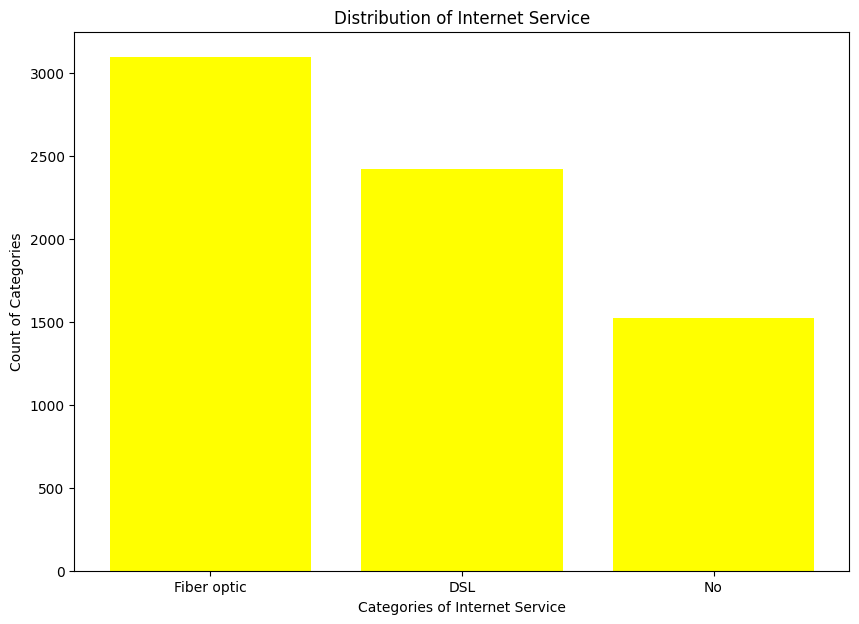

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Internet Service")
plt.xlabel("Categories of Internet Service")
plt.ylabel('Count of Categories')
plt.bar(cat,value,color="yellow")

<Axes: xlabel='Contract', ylabel='tenure'>

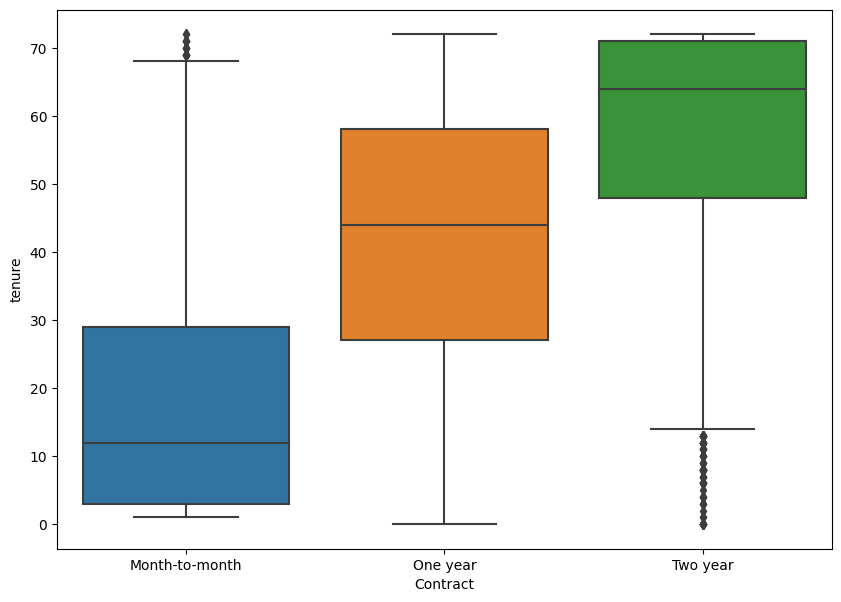

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Contract',y='tenure',data=df)


```

Linear selection

In [ ]:
x=pd.DataFrame(df['tenure'])
y=df['MonthlyCharges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
x_train

,tenure
1768,63
3556,6
6018,33
2840,23
6705,22
...,...
1180,39
3441,34
1344,28
4623,69


In [ ]:
x_test

,tenure
6418,31
1948,2
4497,60
66,47
1705,55
...,...
6308,2
645,20
1269,62
6174,4


In [ ]:
y_train

1768    58.55
3556    19.45
6018    20.35
2840    84.40
6705    51.10
        ...  
1180    49.80
3441    60.80
1344    20.50
4623    95.35
1289    68.80
Name: MonthlyCharges, Length: 4930, dtype: float64

In [ ]:
y_test

6418     79.30
1948     80.75
4497     97.95
66       78.90
1705     90.45
         ...  
6308     70.35
645      94.55
1269    115.55
6174     29.65
4278     97.05
Name: MonthlyCharges, Length: 2113, dtype: float64

Linear regresion

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr_predict=lr.predict(x_test)

In [ ]:
lr_predict

array([64.49956533, 55.84913204, 73.14999862, ..., 73.74658023,
       56.44571365, 69.57050899])

In [ ]:
score=r2_score(lr_predict,y_test)

In [ ]:
score

-15.077138884840458

In [ ]:
mse=mean_squared_error(lr_predict,y_test)

In [ ]:
mse

857.0457573707068

Logistic regression

In [ ]:

x=pd.DataFrame(df['MonthlyCharges'])
y=df['Churn']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=20)

In [ ]:
x_train

,MonthlyCharges
2102,80.55
1985,29.20
5642,19.50
4780,70.05
4538,85.80
...,...
3915,81.25
1428,50.45
6537,115.65
4367,54.10


In [ ]:
x_test

,MonthlyCharges
3309,19.90
321,60.00
3289,88.50
4187,20.25
1675,78.90
...,...
6625,91.30
5672,71.80
4576,19.75
749,90.05


In [ ]:
y_train

2102     No
1985    Yes
5642     No
4780     No
4538    Yes
       ... 
3915     No
1428    Yes
6537    Yes
4367     No
2522     No
Name: Churn, Length: 4577, dtype: object

In [ ]:
y_test

3309     No
321      No
3289     No
4187     No
1675    Yes
       ... 
6625    Yes
5672     No
4576     No
749      No
5476    Yes
Name: Churn, Length: 2466, dtype: object

In [ ]:
log=LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
log_pred=log.predict(x_test)

In [ ]:
accuracy_score(log_pred,y_test)

0.7433090024330901

In [ ]:
confusion_matrix(log_pred,y_test)

array([[1833,  633],
       [   0,    0]])

Desision Tree

In [ ]:
x=pd.DataFrame(df['tenure'])
y=df['Churn']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
x_train

,tenure
4397,72
1287,30
6919,54
2755,46
2475,53
...,...
6017,5
709,29
2487,24
174,32


In [ ]:
x_test

,tenure
6786,11
5085,39
3371,11
6012,5
2748,4
...,...
1613,34
2158,57
5184,68
436,36


In [ ]:
y_train

4397    No
1287    No
6919    No
2755    No
2475    No
        ..
6017    No
709     No
2487    No
174     No
1146    No
Name: Churn, Length: 5634, dtype: object

In [ ]:
Dt=DecisionTreeClassifier()

In [ ]:
Dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
Dt_pred=Dt.predict(x_test)

In [ ]:
accuracy_score(Dt_pred,y_test)

0.7622427253371186

In [ ]:
confusion_matrix(Dt_pred,y_test)

array([[972, 272],
       [ 63, 102]])

Random Forest

In [ ]:
x=pd.DataFrame(df.loc[:,['tenure','MonthlyCharges']])
y=df['Churn']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
Rf=RandomForestClassifier()

In [ ]:
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
Rf_pred=Rf.predict(x_test)

In [ ]:
accuracy_score(Rf_pred,y_test)

0.7622427253371186

In [ ]:
confusion_matrix(Rf_pred,y_test)

array([[972, 272],
       [ 63, 102]])